[4.68749251 5.31249296 5.62499362]
[0, 1, 1]


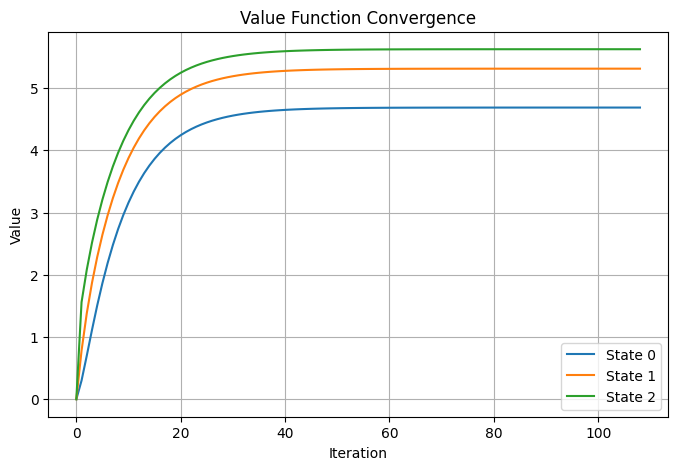

In [ ]:
#Library
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(states, actions, transitions, rewards, gamma, threshold):
    V = np.zeros(len(states))
    value_history = []

    while True:
        max_change = 0
        value_history.append(V.copy())
        for s in range(len(states)):
            old_value = V[s]
            V[s] = max([sum([transitions[s][a][next_s] *
                             (rewards[s][a][next_s] + gamma * V[next_s])
                             for next_s in range(len(states))])
                        for a in range(len(actions))])
            max_change = max(max_change, abs(old_value - V[s]))
        if max_change < threshold:
            break

    policy = [np.argmax([sum([transitions[s][a][next_s] *
                              (rewards[s][a][next_s] + gamma * V[next_s])
                              for next_s in range(len(states))])
                         for a in range(len(actions))]) for s in range(len(states))]

    return V, policy, value_history

states = [0, 1, 2]
actions = [0, 1]
transitions = [[[0.7, 0.3, 0], [0.4, 0.6, 0]],
               [[0.5, 0.5, 0], [0.3, 0.7, 0]],
               [[0.2, 0.8, 0], [0.1, 0.9, 0]]]
rewards = [[[0, 1, 0], [0, 0, 1]],
           [[0, 0, 0], [0, 1, 0]],
           [[1, 0, 0], [0, 1, 0]]]
gamma = 0.9
threshold = 1e-6

V, policy, value_history = value_iteration(states, actions, transitions, rewards, gamma, threshold)

print(V)
print(policy)

# Plot value function convergence
plt.figure(figsize=(8, 5))
for i, history in enumerate(np.array(value_history).T):
    plt.plot(history, label=f'State {i}')
plt.title('Value Function Convergence')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
